# Vizualization

![gif](imgs/VZ002.gif)

## Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from datetime import datetime

## Annotation

(600, 1800)

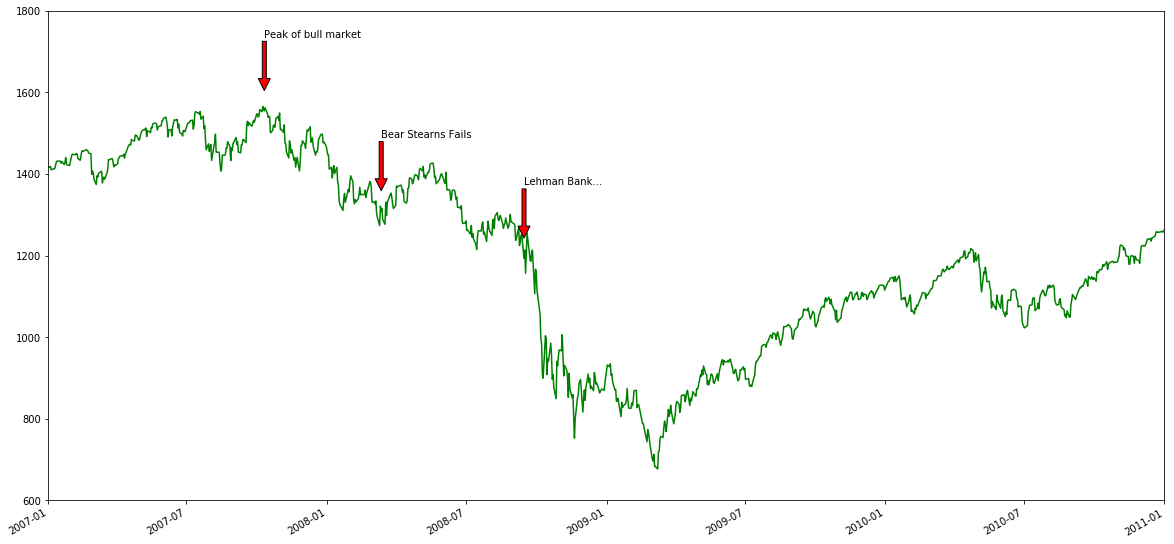

In [2]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('files/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='g-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bank...'),
]

for date, label in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date)+50), 
                xytext=(date, spx.asof(date)+200), 
                arrowprops=dict(facecolor='red'),
                horizontalalignment='left', 
                verticalalignment='top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

## Figures

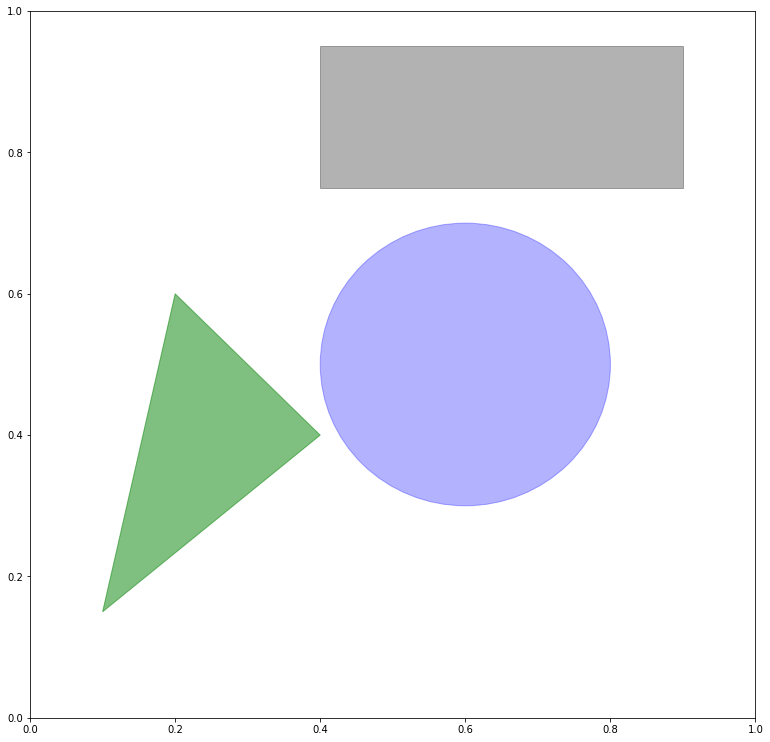

In [3]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.4, 0.75), 0.5, 0.2, color='k', alpha=0.3)
circ = plt.Circle((0.6, 0.5), 0.2, color='b', alpha=0.3)
pgon = plt.Polygon([(0.1, 0.15), (0.4, 0.4), (0.2, 0.6)], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Save imgs

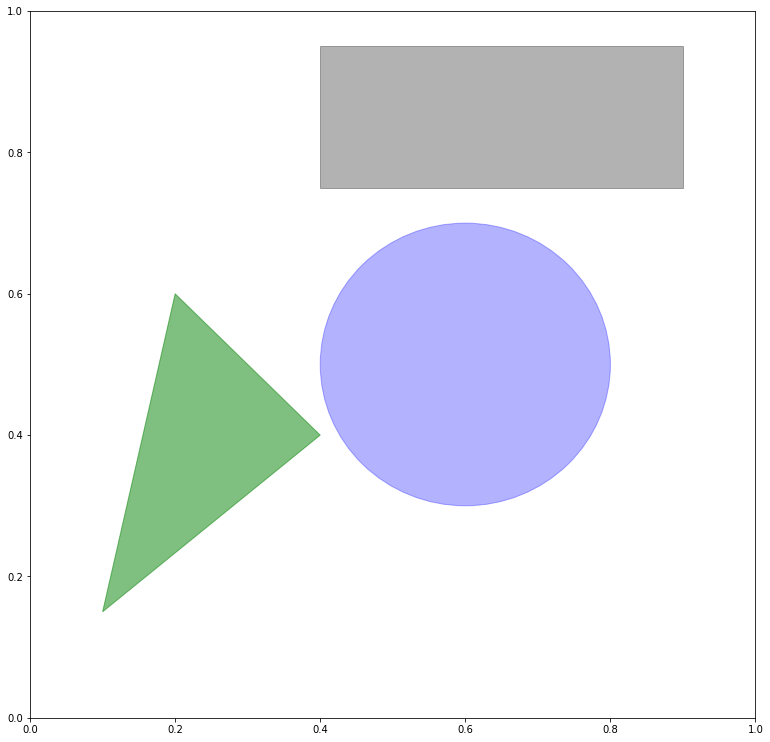

In [4]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.4, 0.75), 0.5, 0.2, color='k', alpha=0.3)
circ = plt.Circle((0.6, 0.5), 0.2, color='b', alpha=0.3)
pgon = plt.Polygon([(0.1, 0.15), (0.4, 0.4), (0.2, 0.6)], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

plt.savefig('imgs/savefig.png', dpi=400, bbox_inches='tight')

## Global configurating

In [5]:
plt.rc('figure', figsize=(8,8))

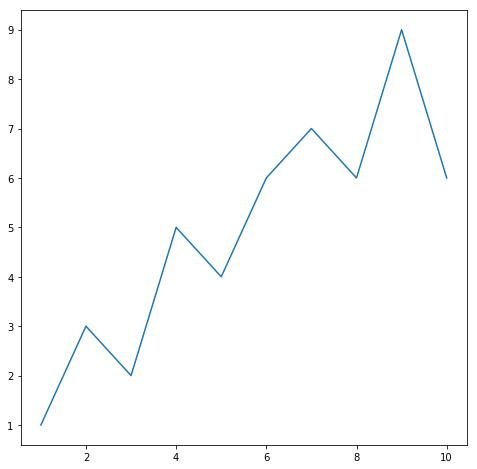

In [6]:
xx = [1,2,3,4,5,6,7,8,9,10]
yy = [1,3,2,5,4,6,7,6,9,6]

plt.plot(xx, yy)
plt.show()

In [7]:
font_options = {'family': 'monospace', 
                'weight': 'bold', 
                'size': 20}

plt.rc('font', **font_options)

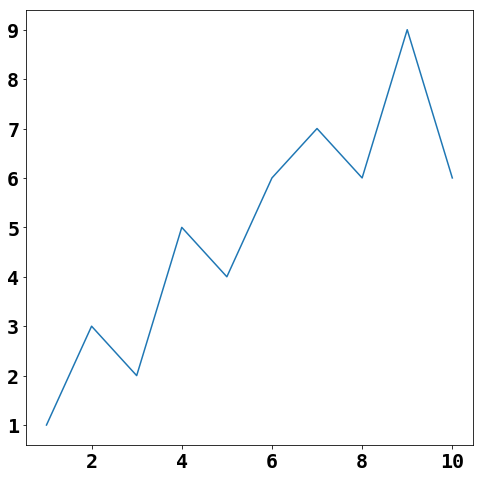

In [8]:
plt.plot(xx, yy)
plt.show()

In [9]:
plt.style.use('ggplot')
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

## Pandas plotting

### Series

In [10]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s

0     0.838708
10    1.409657
20    2.337903
30    1.281637
40    0.481945
50    0.675707
60    1.846541
70    0.808917
80    0.436890
90    1.239819
dtype: float64

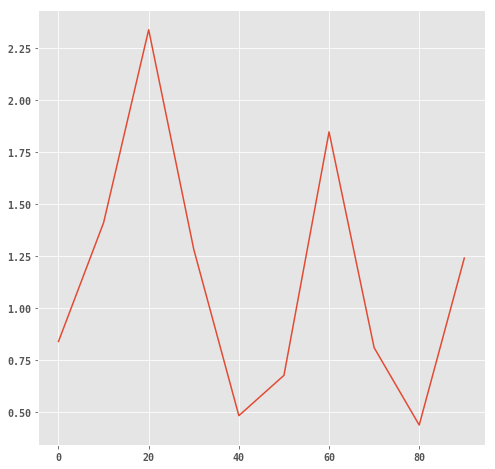

In [11]:
s.plot()

### use_index = False

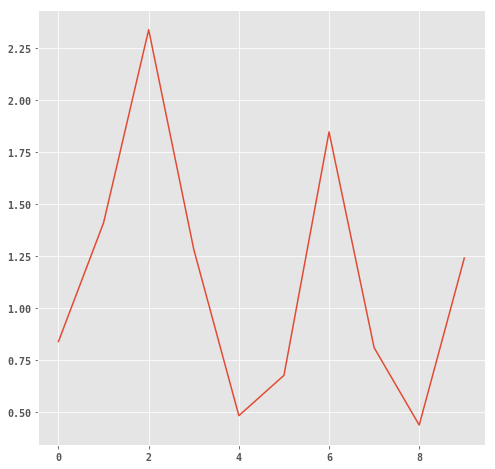

In [12]:
s.plot(use_index=False)

### DataFrame

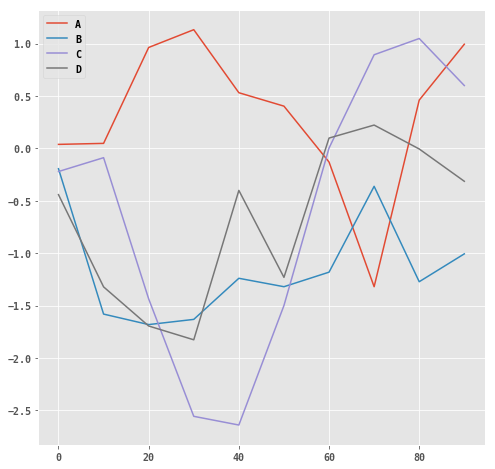

In [13]:
df = pd.DataFrame(np.random.normal(size=(10,4)).cumsum(0), 
                  columns=list('ABCD'), 
                  index=np.arange(0,100,10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000183644307B8>,
      dtype=object)

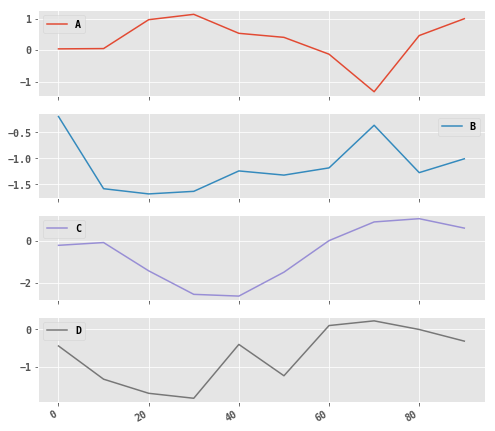

In [14]:
df.plot(subplots=True)

## Bar plots

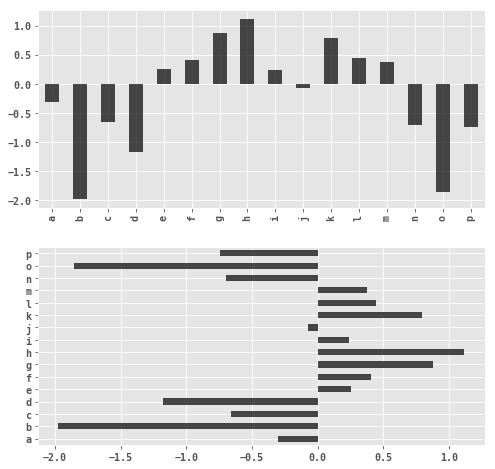

In [15]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [16]:
df = pd.DataFrame(np.random.rand(6,4), 
                  index='one two three four five six'.split(), 
                  columns=pd.Index(list('ABCD'), name='Genus'))
df

Genus,A,B,C,D
one,0.236184,0.977176,0.728303,0.086079
two,0.510310,0.707519,0.843227,0.014509
three,0.203340,0.241274,0.908645,0.518491
four,0.260258,0.035930,0.758975,0.014986
five,0.130589,0.198454,0.820502,0.735891
six,0.681951,0.579071,0.675711,0.361866


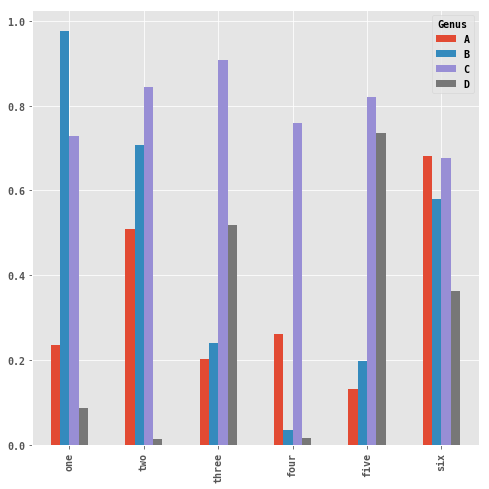

In [17]:
df.plot(kind='bar')

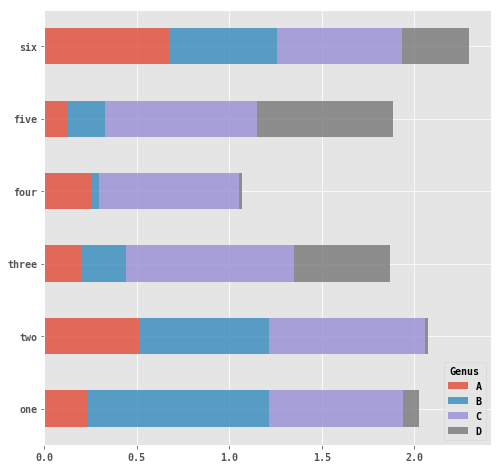

In [18]:
df.plot(kind='barh', stacked=True, alpha=0.8)

### composite bar plot

In [19]:
tips = pd.read_csv('files/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [20]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
party_counts = party_counts.iloc[:, 1:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [22]:
party_pcts = party_counts.div(party_counts.sum(axis=1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


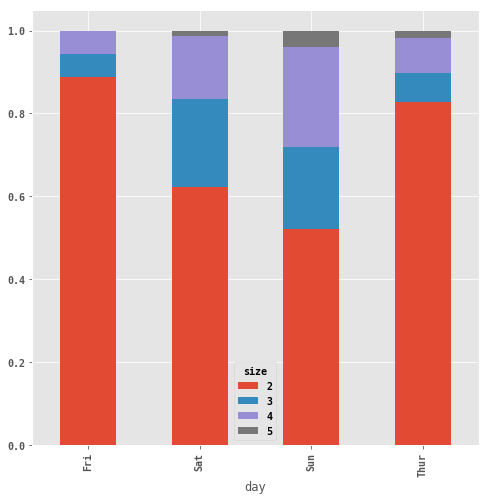

In [23]:
party_pcts.plot(kind='bar', stacked=True)

## Histogram

In [24]:
s = pd.Series(np.random.randn(1000))
s.head()

0    1.489207
1   -1.712120
2   -0.105197
3   -0.748130
4   -0.147823
dtype: float64

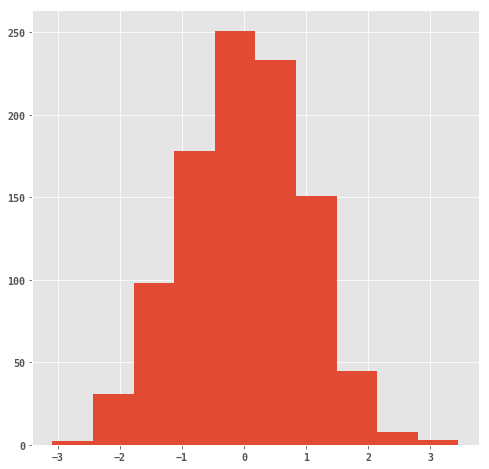

In [25]:
s.hist()

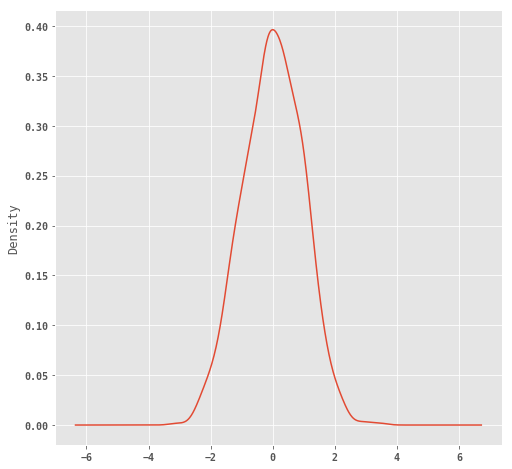

In [26]:
s.plot(kind='kde')

### both

In [27]:
N_0_1 = np.random.normal(0,1,size=200)
N_10_4 = np.random.normal(10,2,size=200)

N = np.concatenate([N_0_1, N_10_4])
N[:10]

array([-0.51561539, -1.21542962,  0.86412754, -0.78056654,  1.56080733,
       -0.19360907,  1.09886581,  1.1734344 , -0.5741607 ,  0.16597165])

In [28]:
values = pd.Series(N)
values.head()

0   -0.515615
1   -1.215430
2    0.864128
3   -0.780567
4    1.560807
dtype: float64

C:\Users\ABorodin\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


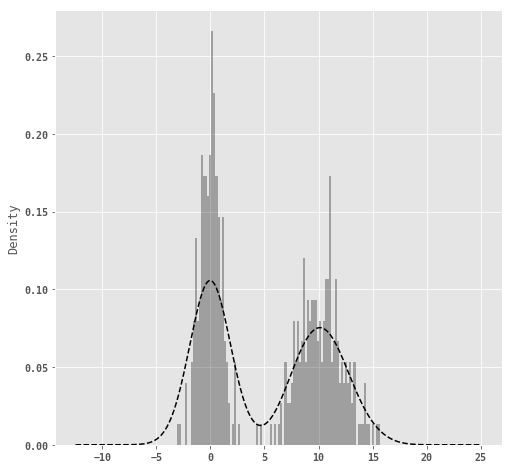

In [29]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

## Scatter plot

In [30]:
macro = pd.read_csv('files/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [31]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [32]:
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


Text(0.5,1,'Changes in log m1 vs unemp')

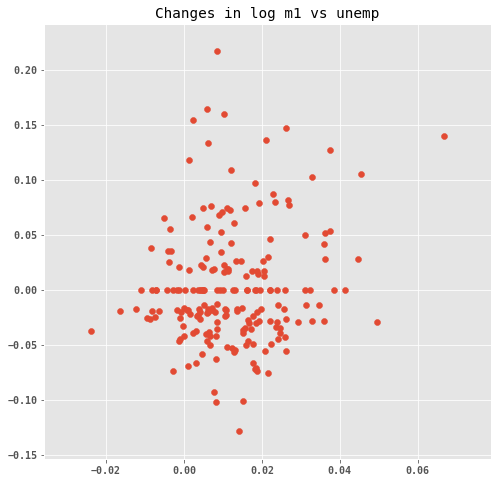

In [33]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs %s' % ('m1', 'unemp'))

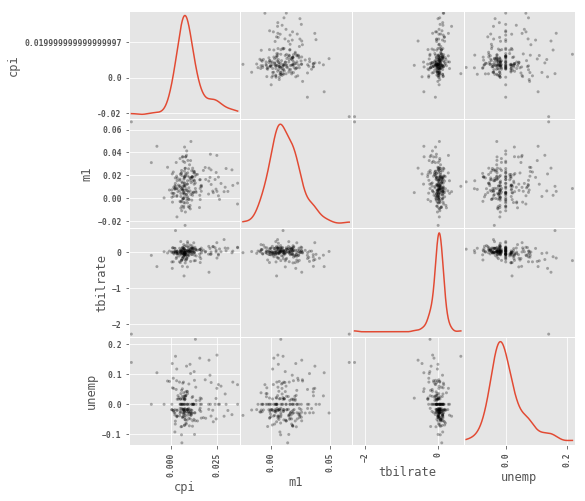

In [34]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)
plt.show()